In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib
import pandas as pd
import os
import re
from tqdm import tqdm
from matplotlib.pyplot import cm

color_array=np.linspace(0,1,11)
cmap = plt.cm.tab20b

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the notebook wider
plt.style.use('default')

In [2]:
drift_E =  np.array([0.000,  100.,  160.,  240.,  300.,  500.,  600.,
			    750.0, 1000., 1250., 1500., 1750., 2000., 2500.,
			    3000., 3500., 4000., 4500., 5000., 1e10])
drift_offset_e = np.array([0,   0.027, 0.038, 0.049 ,0.055, 0.074, 0.081,
			    0.089, 0.101, 0.109, 0.116, 0.119, 0.122, 0.125,
			    0.1275,0.1283,0.1288,0.1291,0.1293,0.1293])

drift_offset_h = np.array([0.0,   0.036, 0.047, 0.056, 0.06,  0.072, 0.077,
			    0.081, 0.086, 0.089, 0.0925,0.095, 0.097, 0.1,
			    0.1025,0.1036,0.1041,0.1045,0.1047,0.1047])

Text(0.5, 0, 'Field')

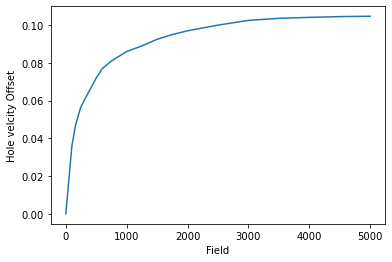

In [3]:
plt.plot(drift_E[:19],drift_offset_h[:19])
plt.ylabel("Hole velcity Offset")
plt.xlabel("Field")

In [4]:
sim_time=1000
time_step_calc = 0.2
n_iter = sim_time/time_step_calc
step_time_out = 10/time_step_calc #out every step for now
time = np.linspace(start=0, stop= n_iter*time_step_calc - step_time_out*time_step_calc, num= (int) (n_iter/step_time_out)+1)

In [5]:
print(len(time))

101


In [19]:
#directory = '/Users/kevinhbhimani/Desktop/siggen_sims/Waveforms/grid_dependence_test/waveforms_p_rho_adjust'
# directory = '/Users/kevinhbhimani/Desktop/siggen_sims/Waveforms/grid_dependence_test/waveforms_no_adjustment'
# directory = '/Users/kevinhbhimani/Desktop/siggen_sims/Waveforms/grid_dependence_test/waveforms_rho_adjustment'
directory = '/global/homes/k/kbhimani/siggen_ccd/waveforms'

energy=np.array([])
grid=np.array([])
sr=np.array([])
detector=np.array([])
surface_charge=np.array([])
radius=np.array([])
height=np.array([])
phi=np.array([])
charge_data = np.empty((0,len(time)),dtype=float)
for filename in tqdm(os.listdir(directory)):
    if('_keV' in filename):
        energy_val = filename.split("_")[0]
        for filename_g in (os.listdir(directory + '/' + filename)):
            if('grid' in directory + '/' + filename_g):
                grid_val = filename_g.split("_")[1]
                if('.DS_Store' in filename_g):
                    continue
                for filename_e in (os.listdir(directory + '/' + filename + '/' + filename_g)):
                    if('self_repulsion' in filename_e):
                        sr_val = filename_e.split("_")[2]
                        for filename_sr in (os.listdir(directory + '/' + filename + '/' + filename_g + '/' + filename_e)):
                            if (filename_sr.startswith('.')) == False:
                                det_val = filename_sr
                                for filename_det in (os.listdir(directory + '/' + filename + '/' + filename_g + '/' + filename_e + '/' + filename_sr)):
                                    if ('q=' in filename_det):
                                        q_val = filename_det.split("=")[1]
                                        for filename_q in (os.listdir(directory+'/'+filename+'/'+ filename_g+'/'+filename_e+'/'+filename_sr+'/'+filename_det)):
                                            if('signal_' in filename_q):
                                                data = np.loadtxt(directory+'/'+filename+'/'+filename_g+'/'+filename_e+'/'+filename_sr+'/'+filename_det+'/'+ filename_q)
                                                
                                                if(len(data)==len(time)):
                                                    r_val = filename_q.split("_")[1].split("=")[1]
                                                    phi_val = filename_q.split("_")[2].split("=")[1]
                                                    z_temp = filename_q.split("_")[3].split("=")[1].split(".")
                                                    z_val = z_temp[0]+"."+z_temp[1]
                                                    energy = np.append(energy, float(energy_val))
                                                    grid = np.append(grid,float(grid_val))
                                                    radius = np.append(radius, float(r_val))
                                                    height = np.append(height, float(z_val))
                                                    phi = np.append(phi, float(phi_val))
                                                    sr = np.append(sr, float(sr_val))
                                                    surface_charge = np.append(surface_charge, float(q_val))
                                                    charge_data = np.vstack([charge_data, data])

100%|██████████| 114/114 [00:44<00:00,  2.54it/s]


In [23]:
cut = (radius==15.00)&(sr==1)&(height==0.10)&(energy==5000.00)&(surface_charge==-0.50)

In [24]:
print(grid[cut][:-1])

[0.005 0.025 0.035 0.015 0.02  0.04  0.01 ]


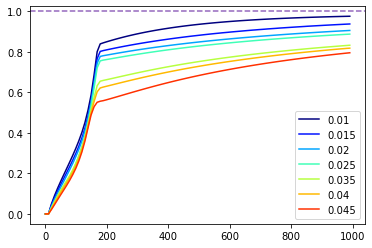

In [25]:
grid_var=np.sort(grid[cut])
color = iter(cm.jet(np.linspace(0, 1, len(grid_var))))
for g in grid_var[1:]:
    c = next(color)
    plt.plot(time, charge_data[cut&(grid==g)][0], c=c, label=str(g))
plt.axhline(y = 1 , color = 'tab:purple', linestyle = '--')
plt.legend()
plt.savefig("figs/grid_neg.png")

In [25]:
dat_test=np.loadtxt('/Users/kevinhbhimani/Desktop/siggen_ccd/waveforms/5000.00_keV/grid_0.0100/self_repulsion_1/P42575A/q=-0.50/signal_r=15.00_phi=0.00_z=0.10.txt')
dat_test_2=np.loadtxt('/Users/kevinhbhimani/Desktop/siggen_ccd/waveforms/5000.00_keV/grid_0.0050/self_repulsion_1/P42575A/q=-0.50/signal_r=15.00_phi=0.00_z=0.10.txt')

In [97]:
print(dat_test_2)

[0.       0.       0.067208 0.120565 0.167901 0.212093 0.254473 0.29566
 0.336214 0.376794 0.418079 0.460842 0.506647 0.55787  0.619095 0.68949
 0.788576 0.901044 0.925472 0.932718 0.939146 0.944827 0.949786 0.954123
 0.957947 0.961329 0.964316 0.966943 0.969262 0.971316 0.973133 0.974745
 0.976176 0.977445 0.978571 0.97957  0.980457 0.981244 0.981942 0.98256
 0.983109 0.983596 0.984029 0.984413 0.984754 0.985057 0.985326 0.985565
 0.985777 0.985966 0.986133 0.986281 0.986413 0.98653  0.986634 0.986726
 0.986808 0.98688  0.986944 0.987002 0.987052 0.987097 0.987138 0.987173
 0.987205 0.987233 0.987258 0.987281 0.987301 0.987318 0.987334 0.987348
 0.98736  0.987371 0.987381 0.98739  0.987397 0.987404 0.98741  0.987416
 0.987421 0.987425 0.987429 0.987432 0.987435 0.987438 0.98744  0.987443
 0.987444 0.987446 0.987448 0.987449 0.98745  0.987451 0.987452 0.987453
 0.987454 0.987454 0.987455 0.987456]


In [98]:
print(dat_test)

[0.       0.       0.049769 0.090266 0.12646  0.160189 0.192594 0.224494
 0.256614 0.289598 0.324197 0.361492 0.403035 0.451762 0.512412 0.586149
 0.687633 0.800664 0.839164 0.844392 0.849071 0.853588 0.857956 0.862186
 0.866281 0.870246 0.874078 0.877786 0.881361 0.884812 0.888135 0.891339
 0.894438 0.897432 0.900314 0.903097 0.90579  0.908383 0.910885 0.913298
 0.915632 0.917895 0.920086 0.922207 0.92425  0.926222 0.92813  0.929977
 0.93176  0.933486 0.935152 0.936761 0.938318 0.939825 0.941284 0.942697
 0.944064 0.94539  0.946674 0.947917 0.949121 0.950287 0.951413 0.952499
 0.953551 0.95457  0.955557 0.956513 0.957439 0.958336 0.959205 0.960046
 0.96086  0.961649 0.962413 0.963154 0.963871 0.964566 0.96524  0.965889
 0.966518 0.967128 0.967718 0.96829  0.968845 0.969382 0.969903 0.970408
 0.970898 0.971372 0.971832 0.972278 0.97271  0.973129 0.973535 0.973928
 0.97431  0.974679 0.975038 0.975385 0.975722]


In [99]:
print(len(dat_test))

101


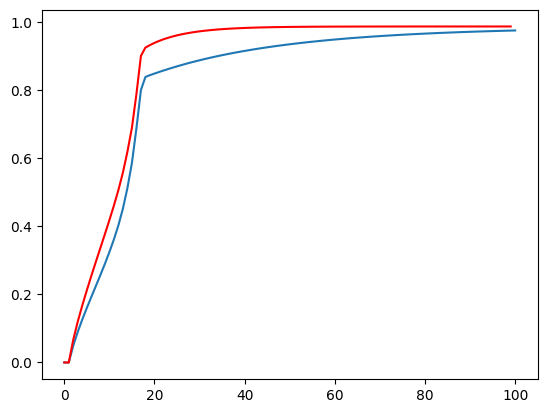

In [100]:
plt.plot(dat_test)
plt.plot(dat_test_2,c='r')